In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Load the first dataset
df_cross = pd.read_csv('./oasis_cross-sectional.csv')
# Display the first few rows of the dataset
df_cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [2]:
df_cross.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [3]:
df_cross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [4]:
cdr_counts = df_cross['CDR'].value_counts(dropna=False)
print(cdr_counts)

NaN    201
0.0    135
0.5     70
1.0     28
2.0      2
Name: CDR, dtype: int64


In the oasis_cross-sectional dataset, the distribution of the CDR values is as follows:

**0.0 (No dementia): 135 instances**

**0.5 (Very mild dementia): 70 instances**

**1.0 (Mild dementia): 28 instances**

**2.0 (Moderate dementia): 2 instances**

**NaN (Missing values): 201 instances**

In [5]:
# Check for missing values in all columns
missing_values = df_cross.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64


Given the information description of the OASIS-1 and OASIS-2 description of 'Education', it's clear that the Educ attribute in the cross-sectional dataset categorizes education levels, while the EDUC attribute in the longitudinal dataset directly represents the number of years of education. 


### Scale Clarification and Conversion ###

Cross-Sectional Dataset (Educ) Codes:
1: Less than high school graduate
2: High school graduate
3: Some college
4: College graduate
5: Beyond college

We can now assign estimated years of education to each category in the Educ attribute to align it with the EDUC scale of 6 to 23 years. Here’s a possible mapping based on typical educational progressions in the U.S.:

1. Less than high school graduate: Typically, this might imply that an individual didn't complete 12 years of schooling. We can estimate this category as ranging from 6 to 11 years.

2. High school graduate: Typically, this represents completing 12 years of education.

3. Some college: This could mean some years spent in college without obtaining a degree, estimated as 13 to 14 years.

4. College graduate: Generally indicates completing a 4-year degree, about 16 years of education.

5. Beyond college: This would cover graduate studies, typically ranging from 17 to beyond, possibly up to 23 years if we consider extensive postgraduate studies.

To convert these categories into a numeric scale that aligns with the longitudinal dataset, we might use a representative value for each category. Here’s a suggestion:

1 (Less than high school graduate): ~10 years

2 (High school graduate): 12 years

3 (Some college): 14  years

4 (College graduate): 16 years

5 (Beyond college): 18+ years



## Conversion Strategy ##

To make these categories comparable to the EDUC values in the longitudinal dataset, which are measured in total years of education, we will map these levels to the estimated years as outlined.

Let's proceed by applying this conversion to the Educ column in the cross-sectional dataset.



In [6]:
# Define a dictionary to map educational levels to estimated years of education
educ_mapping = {
    1: 10,  # Less than high school graduate
    2: 12,  # High school graduate
    3: 14,  # Some college
    4: 16,  # College graduate
    5: 18   # Beyond college
}

# Map the 'Educ' column using the dictionary
df_cross['Educ'] = df_cross['Educ'].map(educ_mapping)

# # Verify the changes by displaying the updated summary statistics
# updated_df_oasis_educ_summary = df_oasis['Educ'].describe()
# updated_df_oasis_educ_summary
df_cross.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,14.357447,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,2.623020,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,10.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,12.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,14.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,16.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,18.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [7]:
# Load the first dataset
df_long = pd.read_csv('./oasis_longitudinal_demographics.csv')
# Display the first few rows of the dataset
df_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [8]:
df_long.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [9]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [10]:
cdr_counts = df_long['CDR'].value_counts(dropna=False)
print(cdr_counts)

0.0    206
0.5    123
1.0     41
2.0      3
Name: CDR, dtype: int64


In the oasis_longitudinal_demographics dataset, the distribution of the CDR values is as follows:

**0.0 (No dementia): 206 instances**

**0.5 (Very mild dementia): 123 instances**

**1.0 (Mild dementia): 41 instances**

**2.0 (Moderate dementia): 3 instances**

Similar to the cross-sectional dataset, this longitudinal dataset also shows an imbalance, with a higher frequency of lower CDR scores (indicating less severe or no dementia) compared to higher scores.

In [11]:
# Check for missing values in all columns
missing_values = df_long.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


### Harmonization of Variable Names and Data Types:

Variable Names: Rename EDUC in OASIS-2 to Educ to match OASIS-1.

Data Types: Ensure Educ is an integer in both datasets.

In [12]:
# Standardizing column names for the longitudinal dataset to match the cross-sectional dataset
df_long.rename(columns={
    'Subject ID': 'ID',
    'EDUC': 'Educ'
}, inplace=True)

# Ensure Educ is float type where possible in both datasets
df_cross['Educ'] = df_cross['Educ'].astype('float')
df_long['Educ'] = df_long['Educ'].astype('float')

# Display the first few rows and data types of each dataset
df_cross.head(), df_cross.dtypes, df_long.head(), df_long.dtypes

(              ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
 0  OAS1_0001_MR1   F    R   74  12.0  3.0  29.0  0.0  1344  0.743  1.306   
 1  OAS1_0002_MR1   F    R   55  16.0  1.0  29.0  0.0  1147  0.810  1.531   
 2  OAS1_0003_MR1   F    R   73  16.0  3.0  27.0  0.5  1454  0.708  1.207   
 3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
 4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   
 
    Delay  
 0    NaN  
 1    NaN  
 2    NaN  
 3    NaN  
 4    NaN  ,
 ID        object
 M/F       object
 Hand      object
 Age        int64
 Educ     float64
 SES      float64
 MMSE     float64
 CDR      float64
 eTIV       int64
 nWBV     float64
 ASF      float64
 Delay    float64
 dtype: object,
           ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  Educ  \
 0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87  14.0   
 1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R

### Handling of Unique and Non-Comparable Attributes:

Handling 'Group': Infer a Group column for OASIS-1 using CDR scores.

Unique Attributes: Retain 'Visit' and 'MR Delay' for OASIS-2, setting them to 'Not Applicable' or NaN for OASIS-1.

In [13]:
# Create 'Group' attribute for OASIS-1 based on CDR scores
df_cross['Group'] = df_cross['CDR'].apply(
    lambda x: 'Nondemented' if x == 0 else 'Demented' if x > 0 else 'NaN'
)

# Add 'Visit' and 'MR Delay' as NaN for OASIS-1
df_cross['Visit'] = 'NaN'
df_cross['MR Delay'] = 'NaN'

### Data Concatenation:

Add a 'Source' column to each dataset before concatenation to distinguish between OASIS-1 and OASIS-2.


### Exclusion of Incomparable Data:

Exclude columns related to neuroimaging data (eTIV, nWBV, ASF) from the final merged dataset.

In [14]:
# Add 'Source' column to each dataset
df_cross['Source'] = 'OASIS-1'
df_long['Source'] = 'OASIS-2'

# Select relevant columns excluding neuroimaging data
columns_to_keep = ['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'Group', 'Source']
df_cross = df_cross.reindex(columns=columns_to_keep)
df_long = df_long.reindex(columns=columns_to_keep)

# Now we can perform a vertical merge (stacking) of the two datasets
df_oasis = pd.concat([df_cross, df_long], ignore_index=True)

# Save to CSV
df_oasis.to_csv('./oasis_merged.csv', index=False)

# Load the first dataset
df_oasis = pd.read_csv('./oasis_merged.csv')

In [15]:
# Display the first few rows of the combined dataset
df_oasis.head(10)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,Group,Source
0,OAS1_0001_MR1,F,R,74,12.0,3.0,29.0,0.0,Nondemented,OASIS-1
1,OAS1_0002_MR1,F,R,55,16.0,1.0,29.0,0.0,Nondemented,OASIS-1
2,OAS1_0003_MR1,F,R,73,16.0,3.0,27.0,0.5,Demented,OASIS-1
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,NaN,OASIS-1
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,NaN,OASIS-1
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,NaN,OASIS-1
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,NaN,OASIS-1
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,NaN,OASIS-1
8,OAS1_0010_MR1,M,R,74,18.0,2.0,30.0,0.0,Nondemented,OASIS-1
9,OAS1_0011_MR1,F,R,52,14.0,2.0,30.0,0.0,Nondemented,OASIS-1


It appears that the missing data is predominantly within the younger participants, have missing data for several key variables like education, socioeconomic status, MMSE and clinical scores. This could potentially indicate that data collection related to cognitive scores and education may not have been deemed as necessary or relevant for younger participants, who are typically at lower risk for Alzheimer's disease.

In [16]:
df_oasis.describe()

,Age,Educ,SES,MMSE,CDR
count,809.000000,608.000000,570.00000,606.000000,608.000000
mean,63.186650,14.504934,2.47193,27.234323,0.288651
std,23.117511,2.781436,1.12805,3.687980,0.377697
min,18.000000,6.000000,1.00000,4.000000,0.000000
25%,49.000000,12.000000,2.00000,26.000000,0.000000
50%,72.000000,14.000000,2.00000,29.000000,0.000000
75%,80.000000,16.000000,3.00000,30.000000,0.500000
max,98.000000,23.000000,5.00000,30.000000,2.000000


In [17]:
df_oasis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      809 non-null    object 
 1   M/F     809 non-null    object 
 2   Hand    809 non-null    object 
 3   Age     809 non-null    int64  
 4   Educ    608 non-null    float64
 5   SES     570 non-null    float64
 6   MMSE    606 non-null    float64
 7   CDR     608 non-null    float64
 8   Group   608 non-null    object 
 9   Source  809 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 63.3+ KB


In [18]:
group_counts = df_oasis['Group'].value_counts(dropna=False)

print(group_counts)

Nondemented    325
Demented       246
NaN            201
Converted       37
Name: Group, dtype: int64


In [19]:
cdr_counts = df_oasis['CDR'].value_counts(dropna=False)
print(cdr_counts)

0.0    341
NaN    201
0.5    193
1.0     69
2.0      5
Name: CDR, dtype: int64


The final dataset contains 436 entries from OASIS-1 and 373 entries from OASIS-2, totaling 809 entries.

The merged dataset now effectively combines the longitudinal and cross-sectional aspects of the OASIS datasets, providing a comprehensive resource for analysis with 325 nondemented, 246 demented, 201 missing values, and 37 converted cases among the participants.

# Handling Missing Values #

In [20]:
# Check for missing values in all columns
missing_values = df_oasis.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

ID          0
M/F         0
Hand        0
Age         0
Educ      201
SES       239
MMSE      203
CDR       201
Group     201
Source      0
dtype: int64


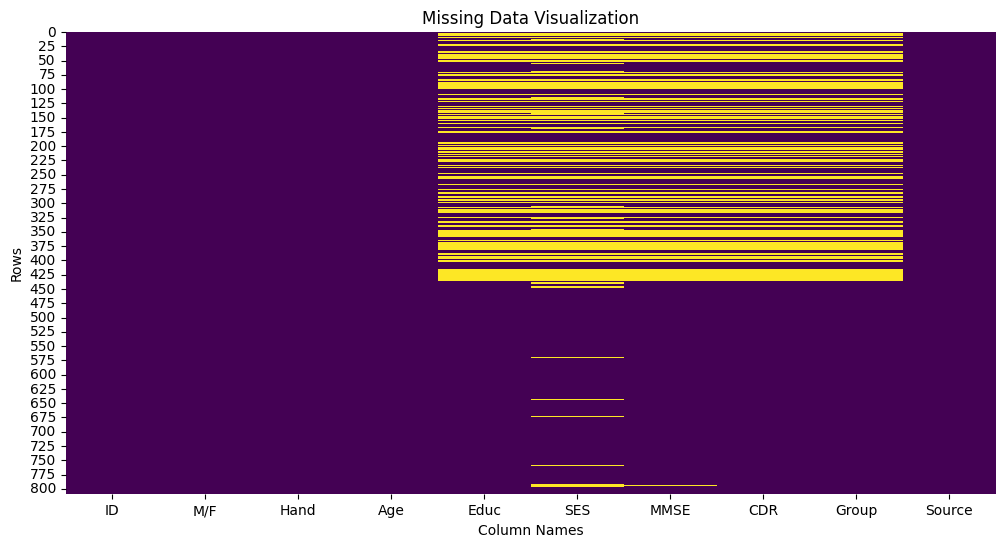

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df_oasis.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.xlabel('Column Names')
plt.ylabel('Rows')
plt.show()

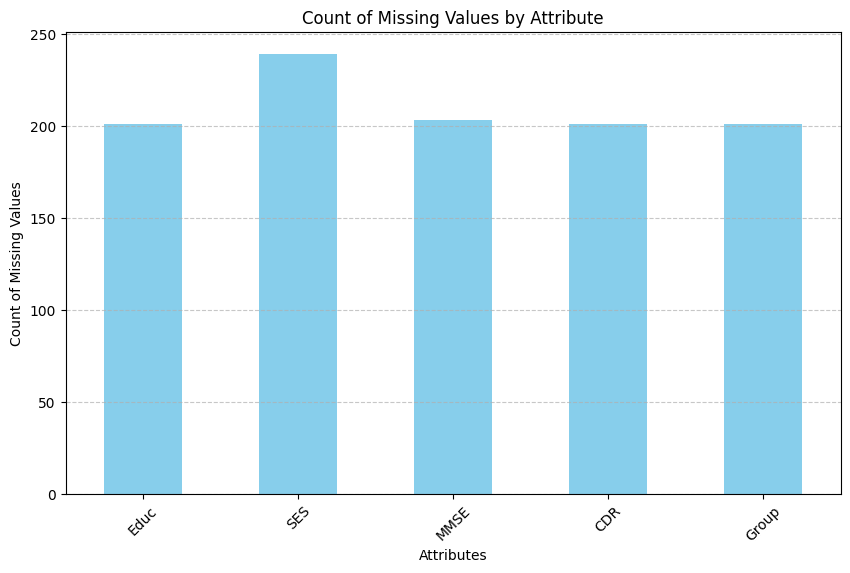

In [22]:
import matplotlib.pyplot as plt

# Calculate the count of missing values for each attribute
missing_count = df_oasis.isnull().sum()
missing_count = missing_count[missing_count > 0]

# Plotting the missing values
plt.figure(figsize=(10, 6))
missing_count.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values by Attribute')
plt.xlabel('Attributes')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The heatmap above visually represents the missing values in the dataset across different columns:

Yellow lines indicate missing values.
Purple represents non-missing values.

#### From the heatmap: ####

**Clusters of Missing Data**: The columns `Educ`, `SES`, `MMSE`, `CDR`, and Group all exhibit similar patterns of missing data. This suggests that the missingness is not random but rather systematic—possibly linked to specific subgroups within the data or specific data collection periods.

**Concentrated Missing Values**: The missing values are relatively concentrated in certain rows across these five columns. This could indicate that entire records are missing key information, which might occur if specific participants did not complete certain parts of a survey or test.

**Impact on Predictive Modeling**: The clustering of missing values in crucial attributes, including the target variable Group, can significantly impact the performance of predictive models. Models rely on complete and accurate data, so these gaps might necessitate strategies like data imputation or the removal of records with missing target values.

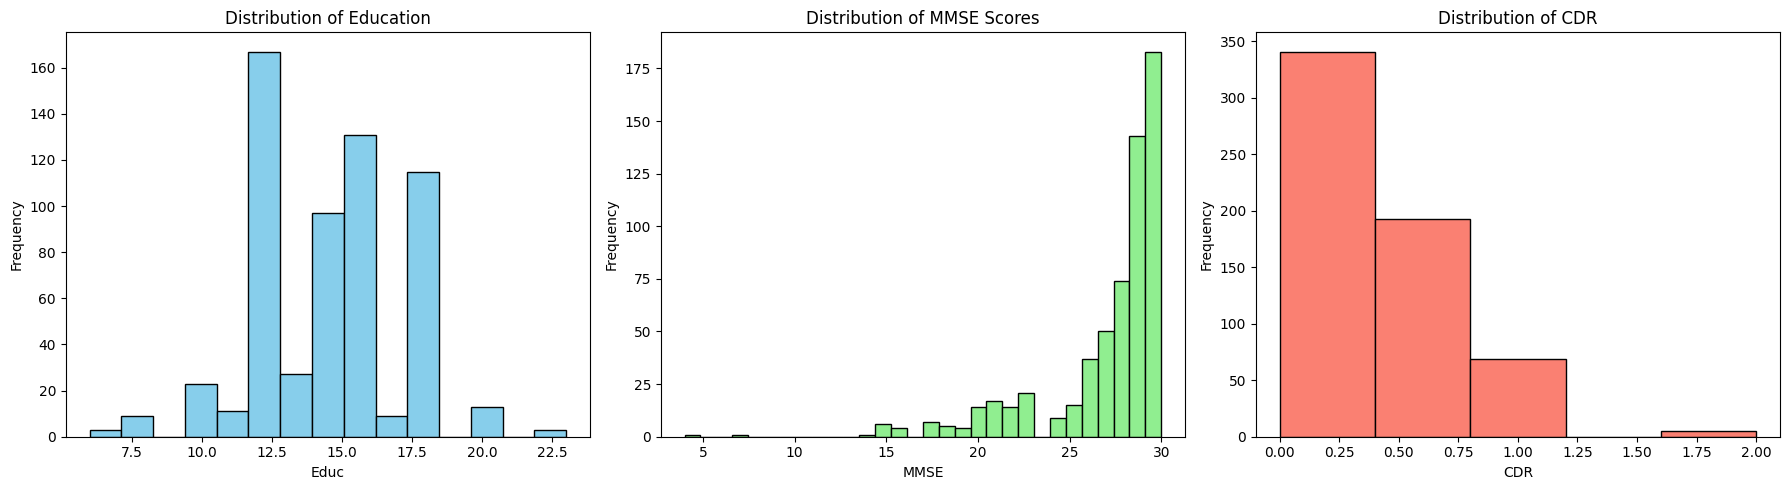

In [23]:
import matplotlib.pyplot as plt

# Plot histograms to understand the distribution of 'Educ', 'MMSE', and 'CDR'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Histogram for Education
df_oasis['Educ'].plot(kind='hist', ax=axes[0], bins=15, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Educ')
axes[0].set_title('Distribution of Education')

# Histogram for MMSE
df_oasis['MMSE'].plot(kind='hist', ax=axes[1], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_xlabel('MMSE')
axes[1].set_title('Distribution of MMSE Scores')

# Histogram for CDR
df_oasis['CDR'].plot(kind='hist', ax=axes[2], bins=5, color='salmon', edgecolor='black')
axes[2].set_xlabel('CDR')
axes[2].set_title('Distribution of CDR')

plt.tight_layout()
plt.show()


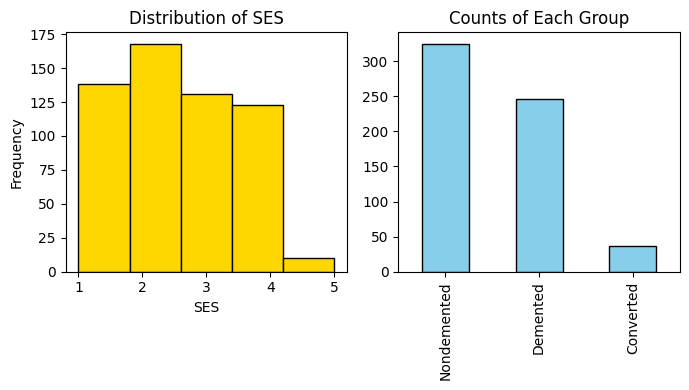

In [24]:
# Create a figure to hold the subplots for SES and Group
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

# Histogram for SES with specified bins and styling
df_oasis['SES'].plot(kind='hist', ax=axes[0], bins=5, color='gold', edgecolor='black')
axes[0].set_xlabel('SES')
axes[0].set_title('Distribution of SES')

# Bar plot for Group to show counts of each category
df_oasis['Group'].value_counts().plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('Counts of Each Group')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


#### Imputation: ####
Mean/Median/Mode Imputation: For numerical columns like Educ, MMSE, and CDR, imputing the mean (for normally distributed data) or median (for skewed data) can be a straightforward approach. For categorical data like Group and SES mode imputation is a common method.

#### Elimination: ####
Excluding records with missing target variables (Group): This method will ensure that our model is trained only on records that have a defined target variable, which is essential for accurate predictive modeling.


Based on the histograms, Let's proceed with imputing the missing values using methods best suited to each column's data type and distribution. Here's the strategy for each:

**Education** appears to have a near-normal distribution, but median imputation might still be preferable due to the presence of outliers on the higher end, so using the median might be preferable to mean imputation to avoid the influence of outliers.

**MMSE** shows a left-skewed distribution with most values clustering toward the higher scores, suggesting that median imputation would be more appropriate than the mean, which might be affected by the lower scores. Median imputation can handle outliers better than the mean.

**CDR** mostly clusters at lower values, and given its ordinal nature, using the median makes sense here as well.

**SES (Socioeconomic Status)**: Given that this is likely a categorical variable (often ordinal), mode imputation (using the most frequent category) could be appropriate.

**Group (Diagnostic Category)**: This is the target variable for the predictive modeling. Imputing the target variable can be problematic as it can introduce bias into the model. Since the missing values are predominantly in the younger age groups who are less likely to be the focus for Alzheimer’s disease studies, removing these entries might not significantly impact the analysis focused on older age groups more likely to exhibit symptoms of cognitive decline. Elimination ensures that the analysis will only be performed on participants for whom complete data is available, maintaining the quality and reliability of the results.

In [25]:
from sklearn.impute import SimpleImputer

# Imputers for each type
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Columns for median imputation
median_columns = ['Educ', 'MMSE', 'CDR']
mode_columns = ['SES']

# Apply median imputation
df_oasis[median_columns] = median_imputer.fit_transform(df_oasis[median_columns])

# Apply mode imputation
df_oasis[mode_columns] = mode_imputer.fit_transform(df_oasis[mode_columns])

# Filter out rows with missing 'Group' values
oasis_filtered = df_oasis.dropna(subset=['Group'])

# Check again for missing values to confirm imputation
oasis_filtered.isnull().sum(), oasis_filtered.head()

(ID        0
 M/F       0
 Hand      0
 Age       0
 Educ      0
 SES       0
 MMSE      0
 CDR       0
 Group     0
 Source    0
 dtype: int64,
               ID M/F Hand  Age  Educ  SES  MMSE  CDR        Group   Source
 0  OAS1_0001_MR1   F    R   74  12.0  3.0  29.0  0.0  Nondemented  OASIS-1
 1  OAS1_0002_MR1   F    R   55  16.0  1.0  29.0  0.0  Nondemented  OASIS-1
 2  OAS1_0003_MR1   F    R   73  16.0  3.0  27.0  0.5     Demented  OASIS-1
 8  OAS1_0010_MR1   M    R   74  18.0  2.0  30.0  0.0  Nondemented  OASIS-1
 9  OAS1_0011_MR1   F    R   52  14.0  2.0  30.0  0.0  Nondemented  OASIS-1)

In [26]:
oasis_filtered.shape

(608, 10)

By reducing the dataset from 809 to 608 entries through the elimination of records with missing target variables, we ensure that our predictive modeling for early detection of Alzheimer's disease is based on the most reliable and complete data available. This focused dataset predominantly includes older age groups, who are the primary subjects of interest in Alzheimer’s studies, thereby enhancing the relevance and specificity of the analysis. Additionally, imputing missing values in other key columns (like Educ, MMSE, SES, and CDR) using appropriate statistical methods helps maintain the integrity of the dataset while minimizing the introduction of bias. This strategic approach of combining imputation and elimination not only optimizes the dataset for more accurate and robust predictive modeling but also aligns with best practices in data science for handling missing data, thus supporting the development of effective diagnostic tools for Alzheimer's disease.

In [27]:
# Save to CSV
oasis_filtered.to_csv('./oasis_filtered.csv', index=False)


# Descriptive Statistics #

In [28]:
# Compute descriptive statistics for the numerical columns
oasis_filtered.describe()

,Age,Educ,SES,MMSE,CDR
count,608.000000,608.000000,608.000000,608.000000,608.000000
mean,75.208882,14.504934,2.442434,27.240132,0.288651
std,9.865026,2.781436,1.098138,3.683290,0.377697
min,33.000000,6.000000,1.000000,4.000000,0.000000
25%,70.000000,12.000000,2.000000,26.000000,0.000000
50%,76.000000,14.000000,2.000000,29.000000,0.000000
75%,82.000000,16.000000,3.000000,30.000000,0.500000
max,98.000000,23.000000,5.000000,30.000000,2.000000


The descriptive statistics provided for the dataset reveal several key characteristics about the participants and their cognitive assessments. Here's a general overview of what these statistics tell us:

1. **Age Distribution:**
The participants are predominantly elderly, with a mean age of about 75 years, reflecting the dataset's focus on older adults, possibly in relation to studies on aging and age-related conditions like Alzheimer’s disease. The wide age range from 33 to 98 suggests the inclusion of a broad spectrum of adults, although the focus remains on the elderly.

2. **Educational Background:**
The average education level of approximately 14.5 years indicates a relatively well-educated cohort. This is higher than the global average and suggests that the participants might have good health literacy, which is important in managing and understanding health conditions including cognitive decline.

3. **Socioeconomic Status (SES):**
With an average SES close to the lower-middle and middle class, the participants might have moderate to good access to healthcare and other resources. This SES distribution is crucial for understanding the environmental and social factors that might influence cognitive health in the population studied.

4. **Cognitive Health Assessments (MMSE and CDR):**
The MMSE scores are relatively high on average, with most scores near the maximum of 30. This indicates that many participants have minimal cognitive impairment. However, the range from 4 to 30 also highlights the presence of participants with significant cognitive challenges.

The CDR scores are generally low (average of 0.29), with most participants scoring 0.5 or lower. This suggests that the majority of participants have no or minimal dementia, aligning with the high MMSE scores. However, the presence of scores up to 2 indicates that there are participants with moderate to severe dementia.

# Data Exploration #

To explore relationships between demographic factors, cognitive scores, and group classifications in the Oasis filtered dataset, we will visualize how they interact. This will help us understand potential predictors for Alzheimer’s disease and how different variables might influence cognitive health. Here's the plan:

1. Visual Exploration: Using visual tools such as box plots, and histograms, we can visually assess distributions, trends, and relationships.

2. Group Comparisons: By comparing different metrics across the diagnostic groups (Group), we can see how demographic and cognitive scores differ between groups like 'Nondemented' and 'Demented'.

Let’s start by creating individual visualizations and then compare these metrics across different Group classifications.

## Visual Exploration: Histograms ##

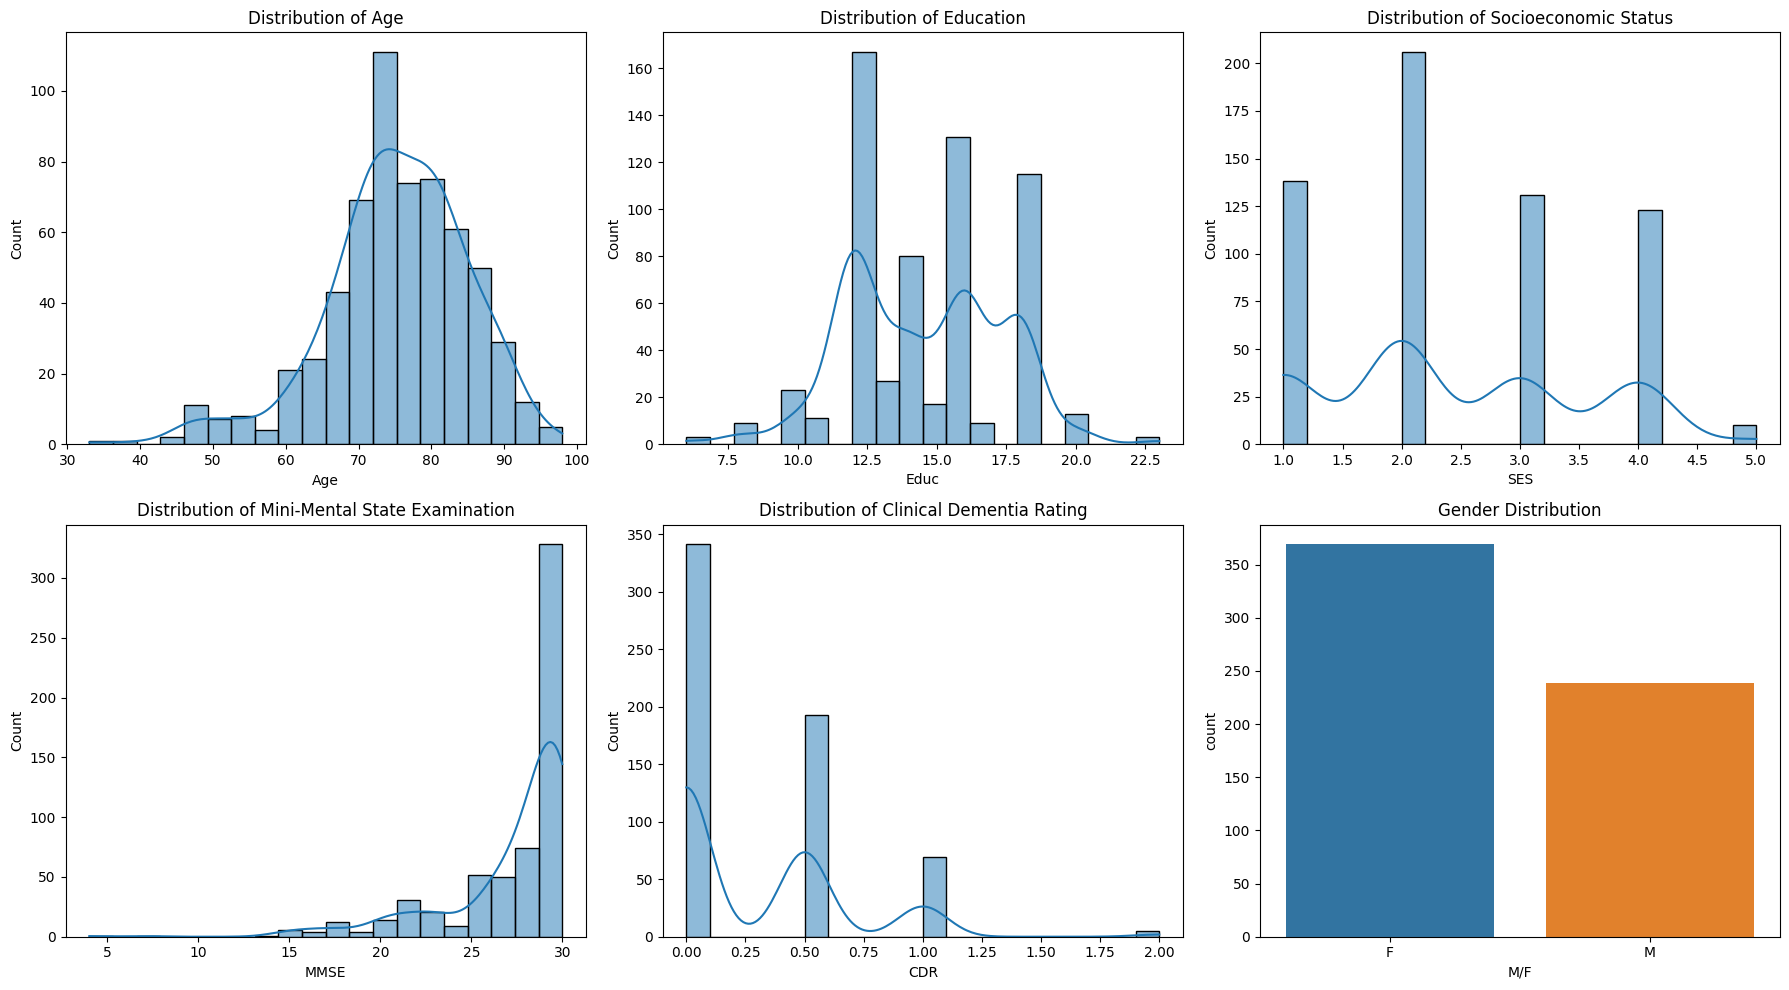

In [29]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Histogram of Age
plt.subplot(2, 3, 1)
sns.histplot(oasis_filtered['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

# Histogram of Education
plt.subplot(2, 3, 2)
sns.histplot(oasis_filtered['Educ'], bins=20, kde=True)  
plt.title('Distribution of Education')

# Histogram of SES
plt.subplot(2, 3, 3)
sns.histplot(oasis_filtered['SES'], bins=20, kde=True)
plt.title('Distribution of Socioeconomic Status')

# Histogram of MMSE
plt.subplot(2, 3, 4)
sns.histplot(oasis_filtered['MMSE'], bins=20, kde=True)
plt.title('Distribution of Mini-Mental State Examination')

# Histogram of CDR
plt.subplot(2, 3, 5)
sns.histplot(oasis_filtered['CDR'], bins=20, kde=True)
plt.title('Distribution of Clinical Dementia Rating')

# Gender distribution
plt.subplot(2, 3, 6)
sns.countplot(x='M/F', data=oasis_filtered)
plt.title('Gender Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


Here are the visualizations for the specified attributes in the dataset:

1. **Distribution of Age**: The histogram shows how the ages are distributed across the dataset. It appears to be fairly evenly distributed among older adults between 60 and 80 years old.

2. **Distribution of Education**: This shows the number of years of education completed by participants. It's clear that the most common education levels are around 12 and 16 years.

3. **Distribution of Socioeconomic Status (SES)**: SES appears to be categorical, with most subjects falling into the middle categories (2 and 3).

4. **Distribution of Mini-Mental State Examination (MMSE)**: The MMSE scores are primarily high, clustered around 27 to 30, indicating generally good cognitive function among the participants. are generally high, with a smaller number showing lower scores.

5. **Distribution of Clinical Dementia Rating (CDR)**: Most participants have a CDR of 0, indicating no dementia, with smaller numbers showing higher ratings.

6. **Gender Distribution**: This bar chart shows the number of males versus females in the study. It appears that there are more females than males.


Given these histogram distributions, it's important to also look at how these variables interact across different diagnostic groups (Group). Let's create visual comparisons to see how age, education, SES, MMSE, and CDR vary between groups like 'Nondemented' and 'Demented'. We'll use box plots for these comparisons, which can effectively reveal differences in medians and distributions. 

## Visual Exploration: Comparative Distribution of Variables by Diagnostic Group ## 

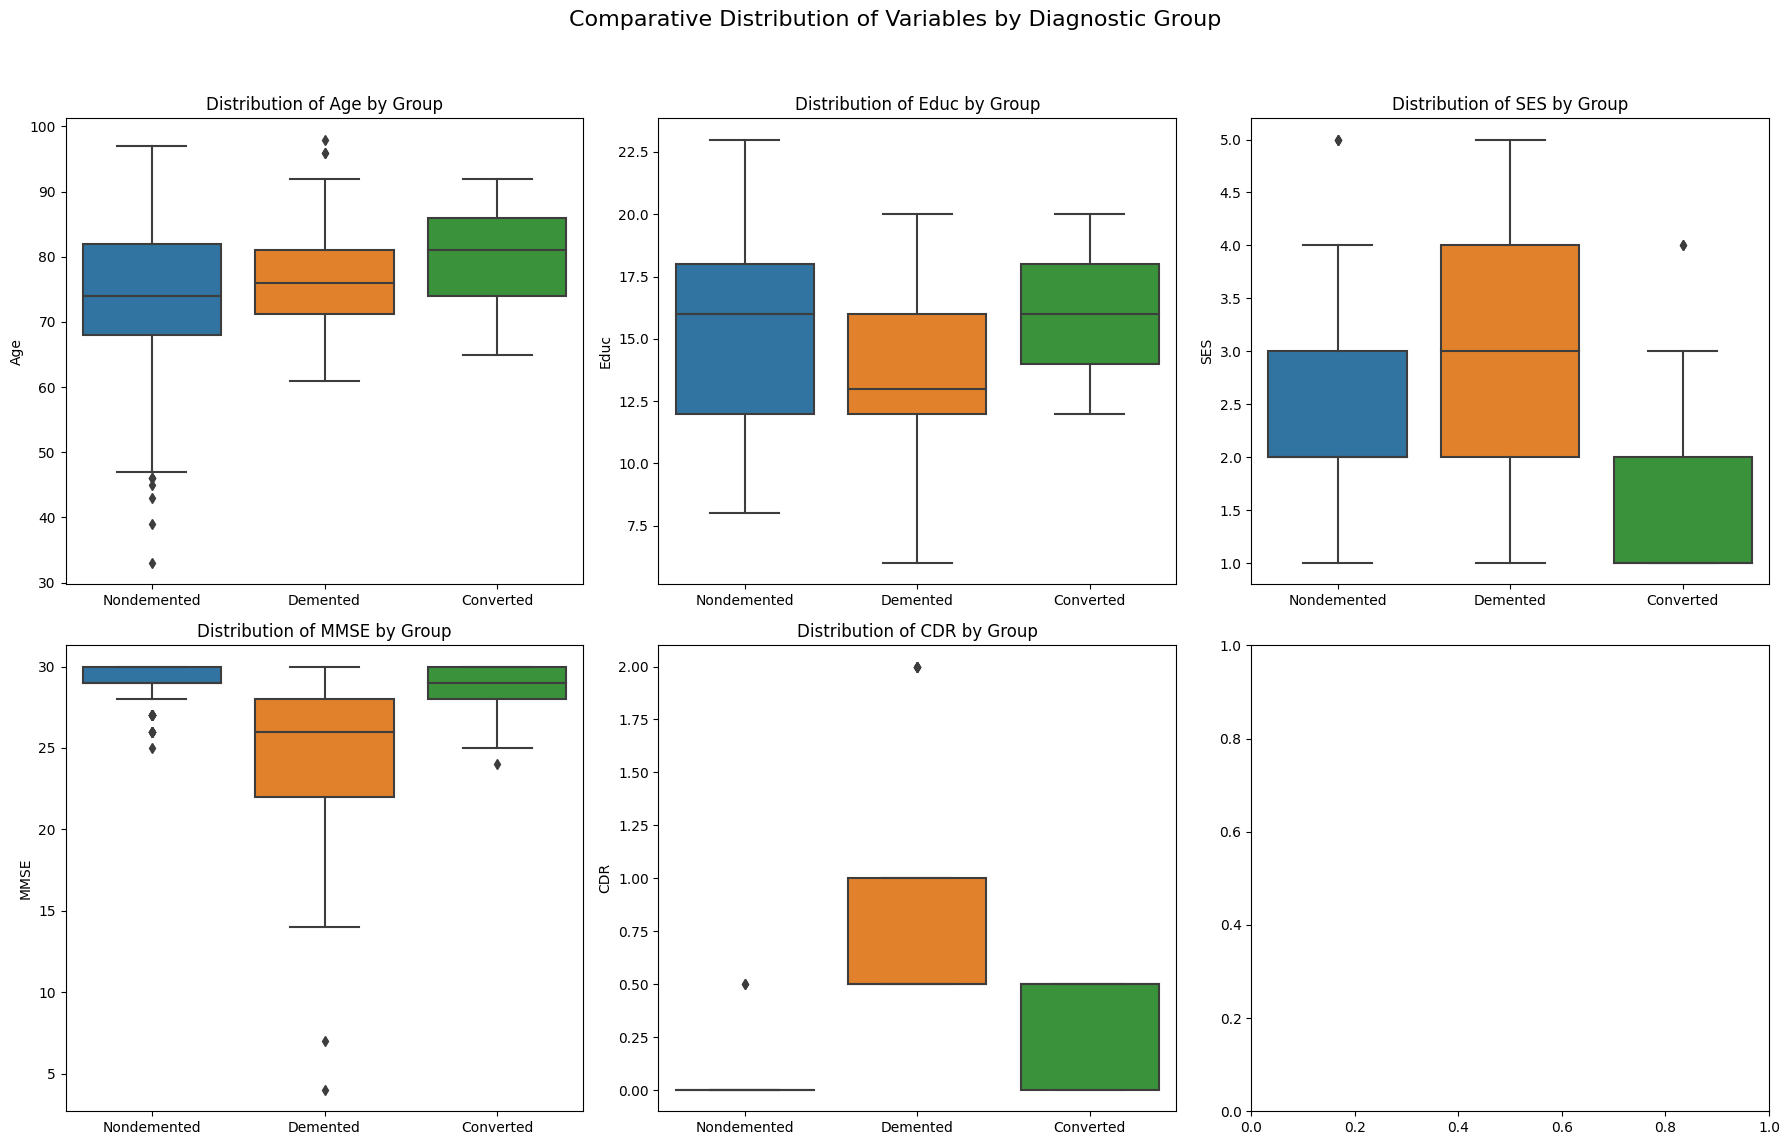

In [30]:
# Setting up the visualization layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparative Distribution of Variables by Diagnostic Group', fontsize=16)

# List of variables to compare
variables = ['Age', 'Educ', 'SES', 'MMSE', 'CDR']

# Create box plots for each variable by Group
for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.boxplot(ax=axes[row, col], x='Group', y=var, data=oasis_filtered)
    axes[row, col].set_title(f'Distribution of {var} by Group')
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel(var)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The box plots provide insights into how various demographic and cognitive measures vary across different diagnostic groups ('Nondemented' vs. 'Demented'). Here are some findings based on the visualizations:

1. **Age**:
There appears to be a slightly higher median age in the 'Demented' group compared to the 'Nondemented' group, consistent with the correlation analysis which showed that age is modestly associated with higher dementia severity (CDR). There are few outliers in all groups indicating some very young or very old participants classified across different dementia statuses.

2. **Education (Educ)**:
The median education level is slightly higher in the 'Nondemented' group. This could suggest that higher education levels may be associated with better cognitive health outcomes, possibly due to a range of lifestyle factors linked to educational attainment.

3. **Socioeconomic Status (SES)**:
The distribution of SES shows less clear differentiation between the groups, though there seems to be a trend towards slightly lower SES in the 'Demented' group. Lower SES could be associated with factors like less access to healthcare or poorer overall health contributing to dementia risk.

4. **Mini-Mental State Examination (MMSE)**:
As expected, MMSE scores are significantly lower in the 'Demented' group, reflecting more pronounced cognitive impairment. This aligns well with MMSE's purpose to screen for cognitive dysfunction.

5. **Clinical Dementia Rating (CDR)**:
By definition, CDR scores are higher in the 'Demented' group, which directly corresponds to the severity of dementia symptoms. There are outliers in the 'Nondemented' group with CDR scores greater than 0, which may indicate individuals with very mild symptoms not sufficient for a dementia diagnosis but noteworthy.

## Visual Exploration: Comparative Distribution of Variables by Diagnostic Group and Gender ## 

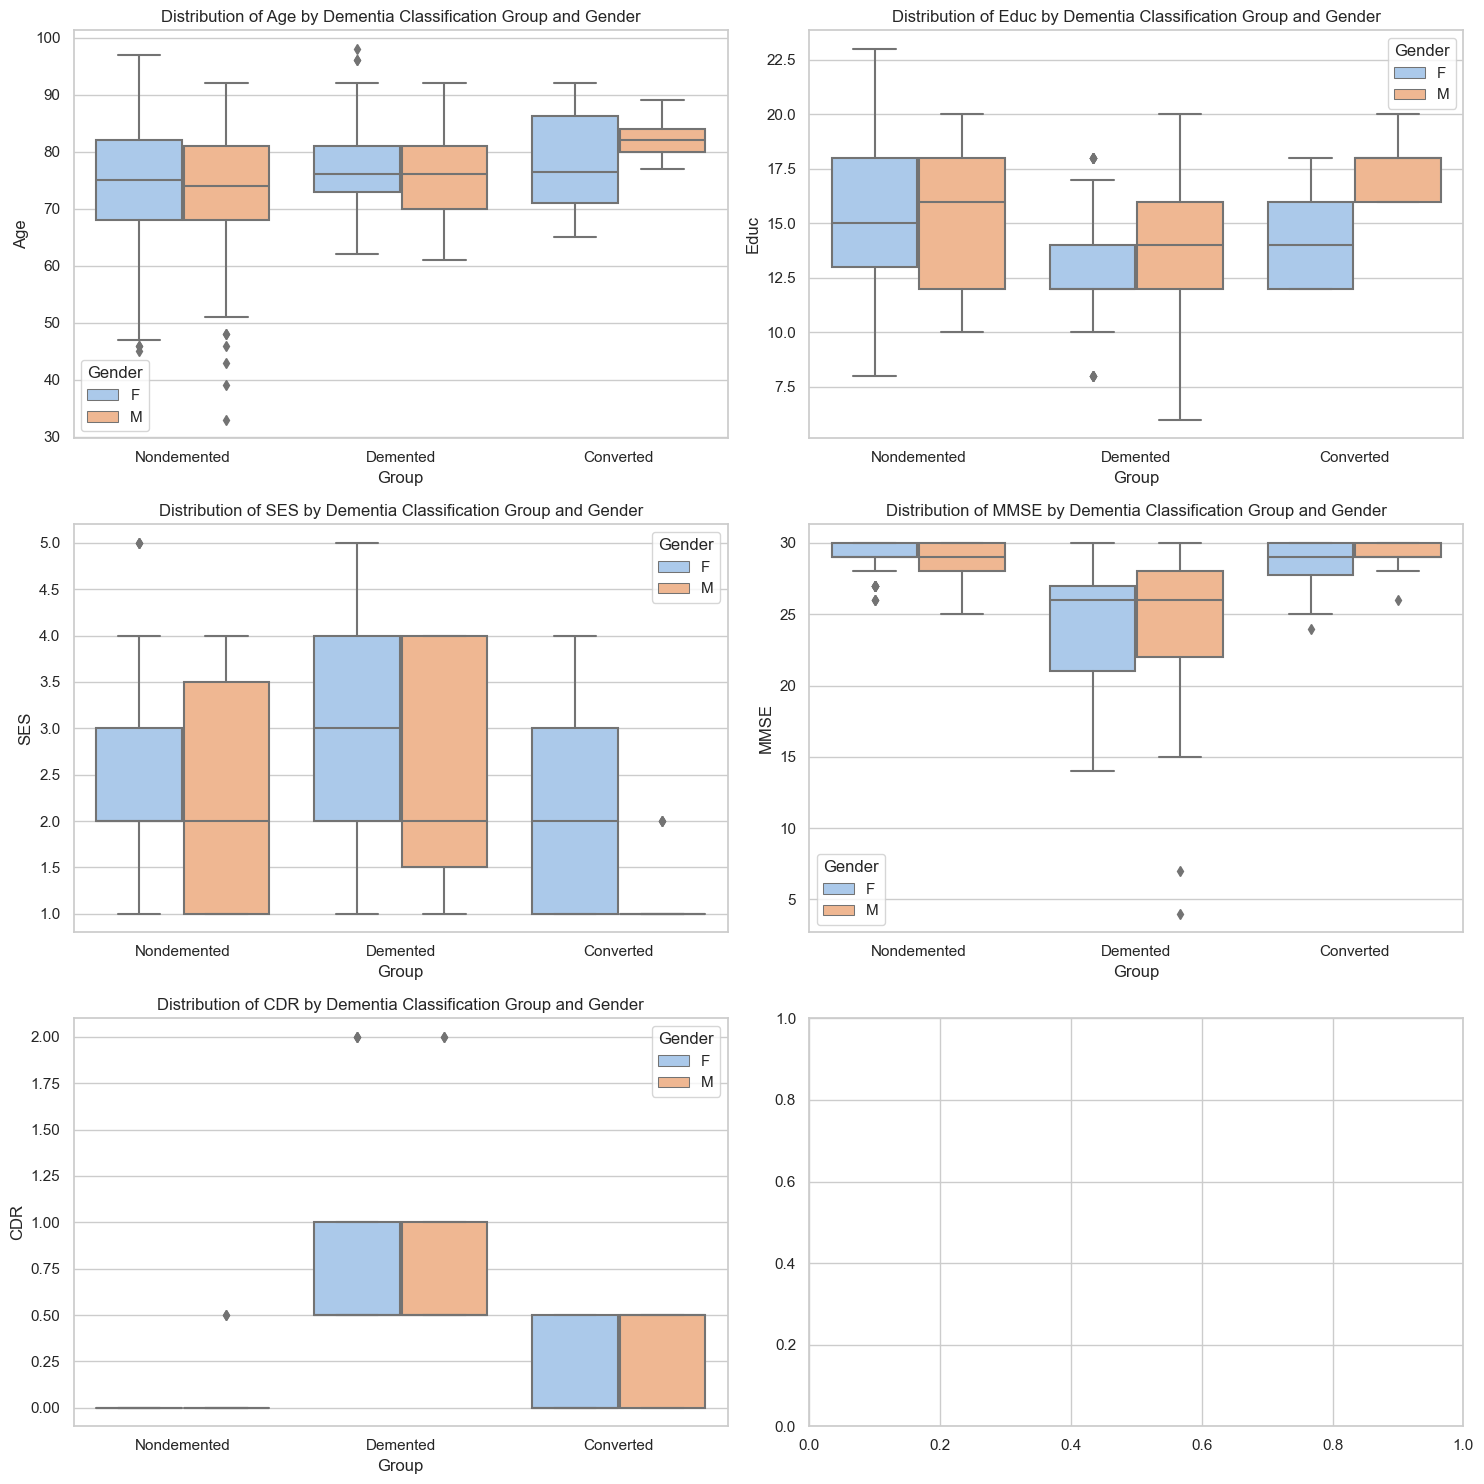

In [31]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a list of variables to plot
variables_to_plot = ['Age', 'Educ', 'SES', 'MMSE', 'CDR']

# Create boxplots for each variable, grouped by dementia classification
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, var in enumerate(variables_to_plot):
    sns.boxplot(ax=axes[i], x='Group', y=var, data=oasis_filtered, hue='M/F', palette='pastel')
    axes[i].set_title(f'Distribution of {var} by Dementia Classification Group and Gender')
    axes[i].set_xlabel('Group')
    axes[i].set_ylabel(var)
    axes[i].legend(title='Gender')

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()


Let's analyze the boxplots and discuss the insights and potential trends from the distribution of attributes among the dementia classification groups, noting gender differences and outliers:

1. **Age:**

- Distribution: The boxplot indicates that the age distribution for both genders in the dementia group is generally older compared to the nondemented group. This aligns with the expectation that the prevalence of dementia increases with age.

- Outliers: There are few outliers, especially in the younger age range for the nondemented group, indicating younger individuals in this dataset might be participating due to reasons unrelated to dementia, such as control subjects or early-onset conditions.

2. **Education (Educ)**:

- Distribution: Education level appears lower on average in the demented group compared to the nondemented group. This could suggest a potential link between lower education levels and a higher incidence of dementia, which is consistent with some studies suggesting that higher education might provide a protective effect against the development of dementia.

- Outliers: There are outliers in both higher and lower education levels across groups, but notably, there are higher education outliers in the demented group, which could be exceptions to general trends.

3. **Socio-Economic Status (SES)**:

- Distribution: Lower socio-economic status seems to be more common in the demented group. This trend could be associated with less access to health resources or lifestyle factors that contribute to dementia risk.

- Outliers: There are outliers particularly in the lower SES ranges across groups. High SES outliers in the demented group might indicate individuals who, despite economic advantages, could not avoid the progression of dementia.

4. **Mini-Mental State Examination (MMSE)**:

- Distribution: There is a clear trend where the demented group scores lower on the MMSE, indicative of cognitive impairment. This is expected as MMSE is a direct measure of cognitive function which is affected in dementia.

- Outliers: The nondemented group shows outliers at the lower scoring end, possibly indicating individuals at risk or in early stages of cognitive decline not yet classified as demented.

5. **Clinical Dementia Rating (CDR)**:

- Distribution: As expected, the CDR scores are higher (indicating more severe impairment) in the demented group. The nondemented group generally has a CDR of 0, although there are a few individuals with higher scores.

- Outliers: The outliers in the nondemented group with higher CDR scores could be indicative of individuals who are on the boundary of being classified as demented or those with other types of neurological issues.


**Gender Differences:**

- Across most attributes, the distribution is similar between genders within each group, suggesting that the impact of these attributes on dementia does not differ markedly by gender. However, in some cases, males and females might have slightly different medians or ranges 